In [14]:
import tensorflow as tf #Deep learning
import tensorflow.keras.datasets as tfd #Datasets from Tensorflow
import matplotlib.pyplot as plt #Graph
import numpy as np #Math and arrays

In [15]:
#Import dataset Fashion MNIST
data = tf.keras.datasets.fashion_mnist

#Split the dataset
(training_images, training_labels), (test_images, test_labels) = data.load_data()

#Transform the image format to 0 - 255
training_images = training_images / 255.0
test_images = test_images / 255.0

## Build the model without CNN

In [19]:
#Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(256, activation= tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation= tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)
])

#Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-tr

In [4]:
#Fit the model
epochs = 50

history = model.fit(
    training_images,
    training_labels,
    epochs = epochs
)

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5398 - accuracy: 0.8044
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4053 - accuracy: 0.8529
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3739 - accuracy: 0.8637
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3488 - accuracy: 0.8731
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3381 - accuracy: 0.8745
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3231 - accuracy: 0.8802
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3151 - accuracy: 0.8826
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3046 - accuracy: 0.8867
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2960 - accuracy: 0.8889
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.289

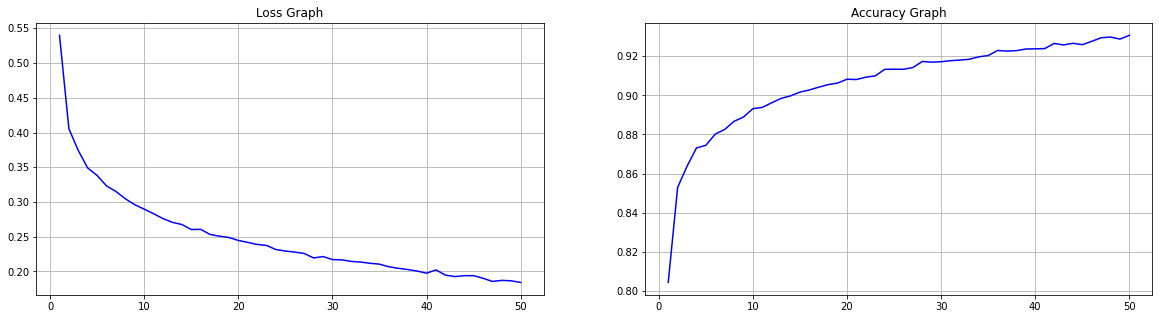

In [5]:
figure, axis = plt.subplots(1, 2, figsize= (20, 5))

# For loss graph
axis[0].set_title("Loss Graph")
axis[0].plot(range(1, epochs + 1, 1), history.history['loss'], '-', c= 'blue', label= 'Loss')
axis[0].grid()

# For accuracy graph
axis[1].set_title("Accuracy Graph")
axis[1].plot(range(1, epochs + 1, 1), history.history['accuracy'], '-', c= 'blue', label= 'Accuracy')
axis[1].grid()

In [6]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3699 - accuracy: 0.8935


[0.3698965609073639, 0.8934999704360962]

## Build the model with CNN

In [7]:
#Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation= tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)
])

#Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [8]:
#Fit the model
epochs = 20

history = model.fit(
    training_images,
    training_labels,
    epochs=epochs
)

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.6666 - accuracy: 0.7558
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4249 - accuracy: 0.8450
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3695 - accuracy: 0.8675
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3342 - accuracy: 0.8789
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3112 - accuracy: 0.8870
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2933 - accuracy: 0.8943
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2807 - accuracy: 0.8999
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2701 - accuracy: 0.9027
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2581 - accuracy: 0.9066
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.250

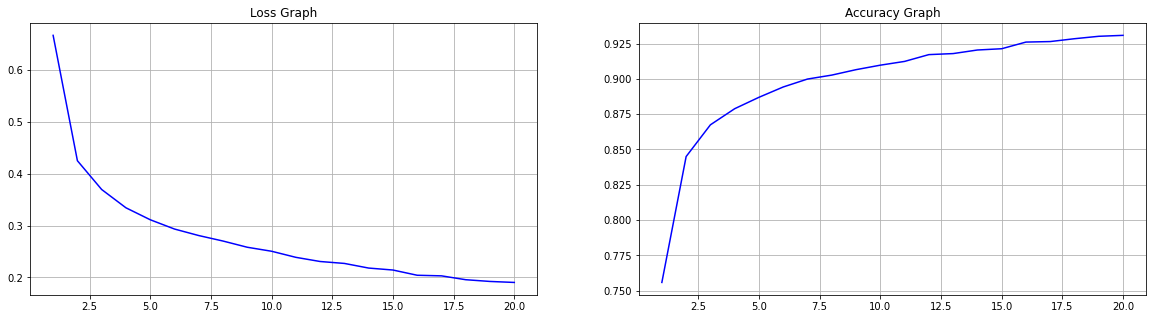

In [9]:
figure, axis = plt.subplots(1, 2, figsize= (20, 5))

# For loss graph
axis[0].set_title("Loss Graph")
axis[0].plot(range(1, epochs + 1, 1), history.history['loss'], '-', c= 'blue', label= 'Loss')
axis[0].grid()

# For accuracy graph
axis[1].set_title("Accuracy Graph")
axis[1].plot(range(1, epochs + 1, 1), history.history['accuracy'], '-', c= 'blue', label= 'Accuracy')
axis[1].grid()

In [10]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3009 - accuracy: 0.9028


[0.3009036183357239, 0.9028000235557556]